<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cross-Validation-Assignment" data-toc-modified-id="Cross-Validation-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cross Validation Assignment</a></span><ul class="toc-item"><li><span><a href="#Basic" data-toc-modified-id="Basic-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic</a></span><ul class="toc-item"><li><span><a href="#Part-1:-Loading-&amp;-Splitting-Data" data-toc-modified-id="Part-1:-Loading-&amp;-Splitting-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Part 1: Loading &amp; Splitting Data</a></span></li><li><span><a href="#Part-2:-K-fold-Cross-Validation" data-toc-modified-id="Part-2:-K-fold-Cross-Validation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Part 2: K-fold Cross Validation</a></span><ul class="toc-item"><li><span><a href="#Simple-Train-and-Test-Split" data-toc-modified-id="Simple-Train-and-Test-Split-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Simple Train and Test Split</a></span></li><li><span><a href="#K-fold-Cross-Validation" data-toc-modified-id="K-fold-Cross-Validation-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>K-fold Cross Validation</a></span></li></ul></li></ul></li><li><span><a href="#Advanced" data-toc-modified-id="Advanced-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Advanced</a></span><ul class="toc-item"><li><span><a href="#Part-3:-Investigation-of-Hyperperameters" data-toc-modified-id="Part-3:-Investigation-of-Hyperperameters-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Part 3: Investigation of Hyperperameters</a></span></li></ul></li></ul></li></ul></div>

# Cross Validation Assignment


## Basic
### Part 1: Loading & Splitting Data

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
boston = load_boston()
X = boston.data # housing features
y = boston.target # housing prices

In [3]:
random.seed(2021)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Part 2: K-fold Cross Validation

#### Simple Train and Test Split

In [5]:
def rmse(y_true, y_pred):
    mse = ((y_true - y_pred)**2).mean()
    return np.sqrt(mse)

In [6]:
# A simple correctness check
foo = np.array([4,3,1,6,8])
bar = np.array([4,6,1,3,7])
print(rmse(foo,bar))
print(np.sqrt(mean_squared_error(foo,bar)))

1.9493588689617927
1.9493588689617927


In [8]:
# Fit your model using the training set
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = reg.predict(X_train)
test_predicted = reg.predict(X_test)

# Calculate RMSE for training and test set
print( 'RMSE for training set ', rmse(y_train, train_predicted) )
print( 'RMSE for test set ', rmse(y_test, test_predicted))

RMSE for training set  5.4380363715073115
RMSE for test set  5.373032985620592


When we evaluate our RMSE on a new set of data, we gain an understanding of how well we are 
capturing the signal in our data.  We can build more complex models that may bend to perfectly
fit our training data.  However, these models are not going to extend well to a new set of data,
because they are likely overfit to our training data.  

By evaluating our performance metric on a new set of data, we assure that we are modeling signal
and not the noise in our data.


#### K-fold Cross Validation

In [9]:
#1
def cross_val(X_train, y_train, k=3):
    ''' Returns error for k-fold cross validation. '''
    kf = KFold(n_splits=k)
    error = np.empty(k)
    index = 0
    for train, test in kf.split(X_train):
        reg = KNeighborsRegressor()
        reg.fit(X_train[train], y_train[train])
        pred = reg.predict(X_train[test])
        error[index] = rmse(pred, y_train[test])
        index += 1
    return np.mean(error)

In [10]:
#2
cross_val(X_train, y_train, k=5)

7.0263672472455285

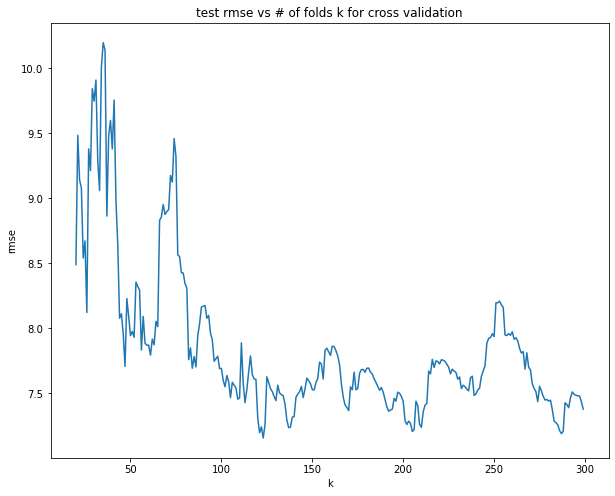

In [12]:
#3
cv_scores = []
for n in range(20,300):
    cv_score = cross_val(X_train[:n], y_train[:n], k=5)
    cv_scores.append(cv_score)


fig, ax = plt.subplots(figsize=(10,8))    
ax.plot(list(range(20,300)),cv_scores)
ax.set_xlabel('k')
ax.set_ylabel('rmse')
ax.set_title('test rmse vs # of folds k for cross validation');

## Advanced
### Part 3: Investigation of Hyperperameters

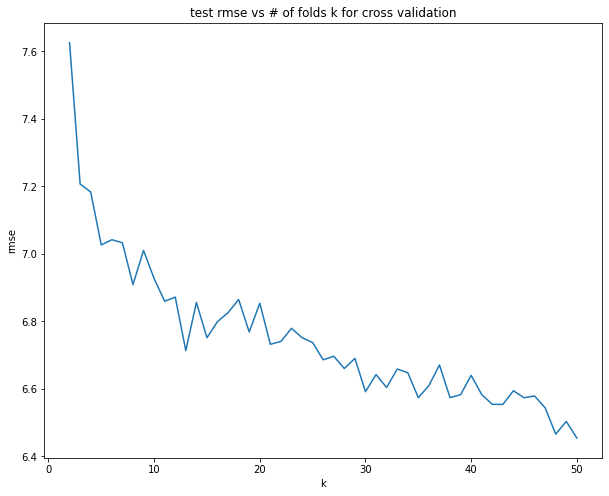

In [13]:
#1
cv_scores = []
for k in range(2,51):
    cv_score = cross_val(X_train, y_train, k=k)
    cv_scores.append(cv_score)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(2,51),cv_scores)
ax.set_xlabel('k')
ax.set_ylabel('rmse')
ax.set_title('test rmse vs # of folds k for cross validation');

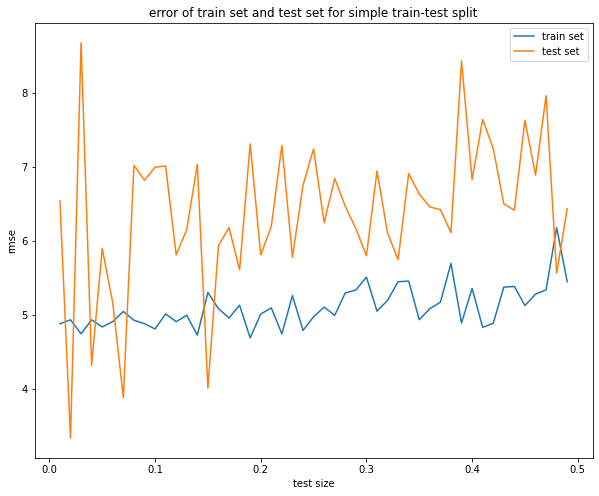

In [14]:
#2 
train_errors = []
test_errors = []
test_sizes = [i*0.01 for i in range(1,50)]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    reg = KNeighborsRegressor()
    reg.fit(X_train, y_train)

    # Call predict to get the predicted values for training and test set
    train_predicted = reg.predict(X_train)
    test_predicted = reg.predict(X_test)

    # Calculate RMSE for training and test set
    train_errors.append(rmse(y_train, train_predicted))
    test_errors.append(rmse(y_test, test_predicted))

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(test_sizes, train_errors, label ="train set")
ax.plot(test_sizes, test_errors, label ="test set")
ax.legend()
ax.set_xlabel('test size')
ax.set_ylabel('rmse')
ax.set_title('errors of train set and test set for simple train-test split');